In [2]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [3]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [4]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [5]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [6]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [7]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

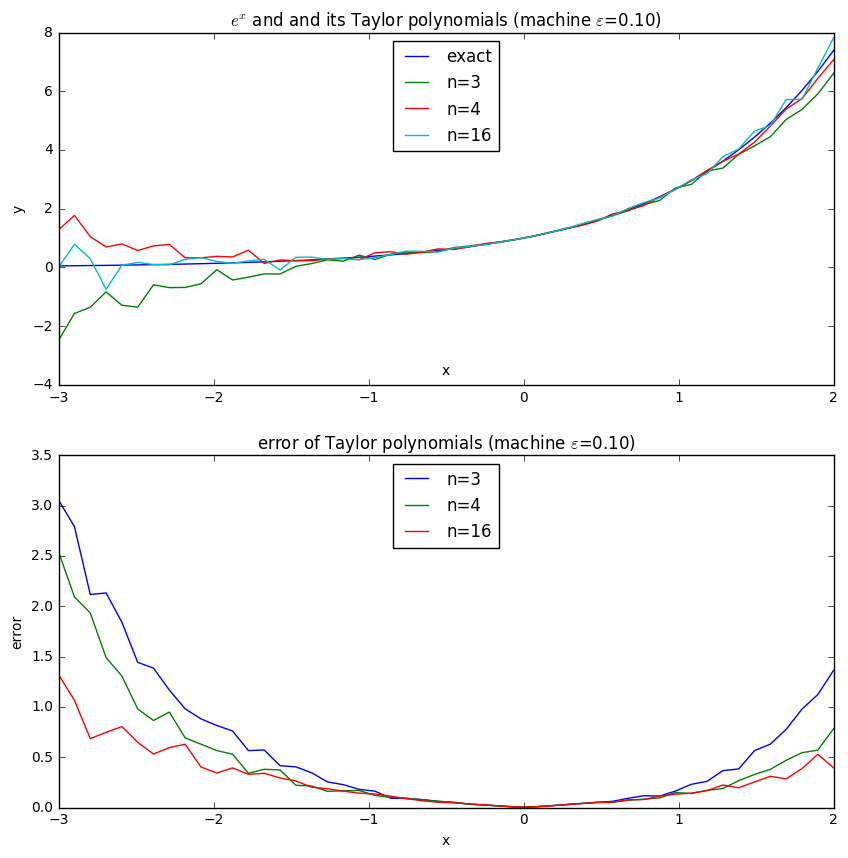

In [8]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

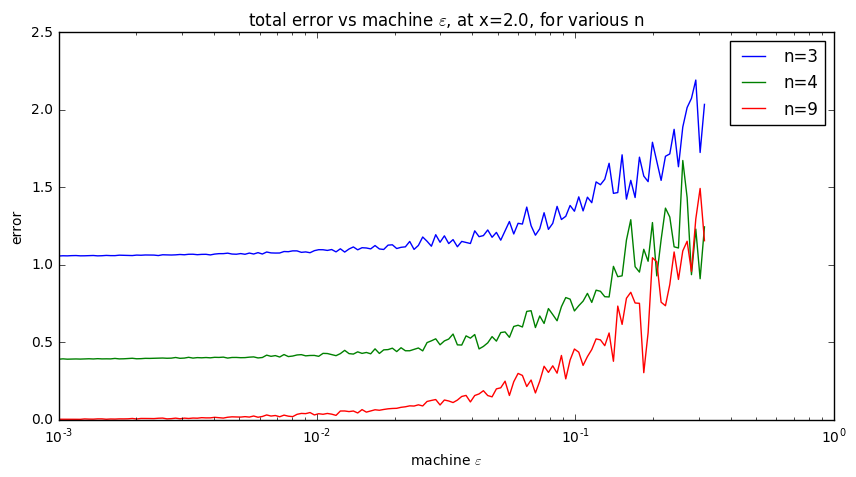

In [9]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

In [10]:
xlist = [1,2,3]
nlist=range(1,30)
eps=^==-àç
---.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-958bc159c0ef>, line 3)

We investigate on the relation between the threshold point where increasing $n$ does not improve the error and the values of $x$ and $\varepsilon$. In order to do that, we first need to have a precise way to define this threshold that is easily implemented. We chose to define this point to be the first value of $n$ such that the error increases compared to $n-1$. We then plot that value in function of $x$ with different values of $\varepsilon$ and vice-versa.

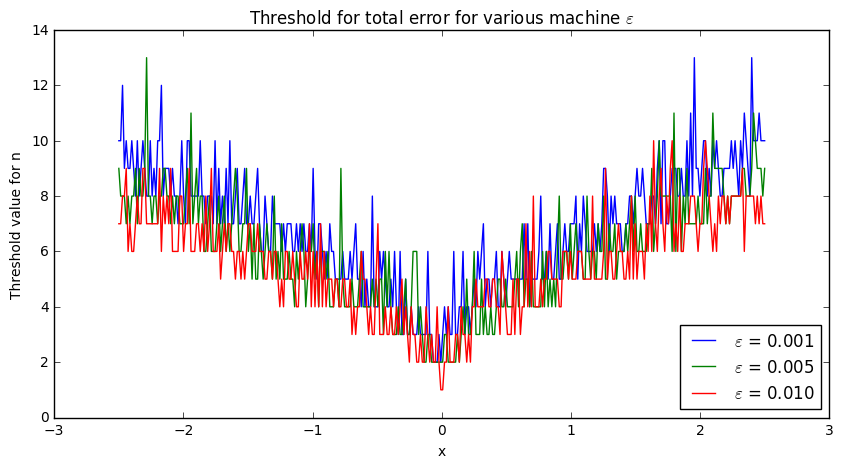

In [11]:
#We use the same sampling as done above
xlist = np.linspace(-2.5,2.5,350)
nlist = range(1,30)
def findThreshold(errlist):
    for i in range(1,len(errlist)): # find the first index where error increases
        if errlist[i] >= errlist[i-1]:
            return i
    return i # if no threshold was found, give the last error

#We reused code from above to plot the error in function of x.
plt.figure(figsize=(10,5))
for eps in [0.001, 0.005, 0.01]:
    y=  [findThreshold(np.abs(errnlist(nlist,x,eps))) for x in xlist ]
    plt.plot(xlist,y,label=r'$\varepsilon$ = %.3f'%eps)

plt.title(r'Threshold for total error for various machine $\varepsilon$')
plt.xlabel('x')
plt.ylabel('Threshold value for n')
plt.legend(loc='lower right')
plt.show()

We have used smaller values for $\varepsilon$ because otherwise the graph would be even messier than it is. We can still extract a trend that the number of iterations we need is lower for values closer to 0. Let us do the same when changing $\varepsilon$.

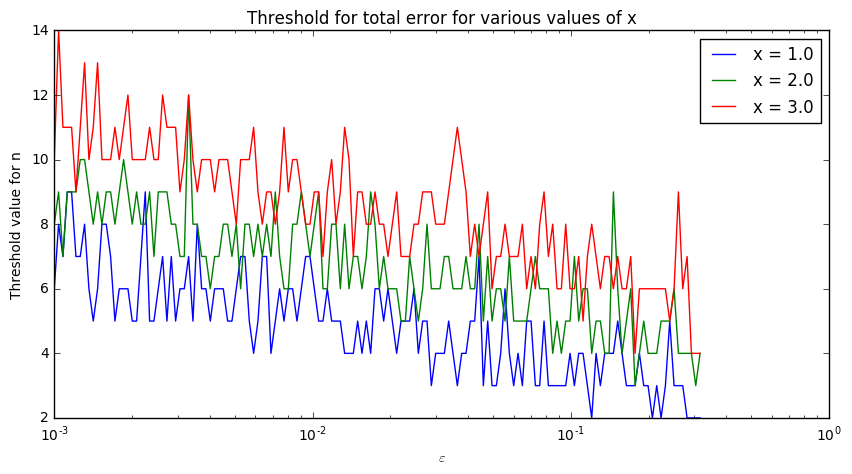

In [13]:
elist = np.logspace(-3,-.5, 150)
nlist = range(1,30)

#We reused code from above to plot the error in function of x.
plt.figure(figsize=(10,5))
for x in [1.0, 2.0, 3.0]:
    y=  [findThreshold(np.abs(errnlist(nlist,x,e))) for e in elist ]
    plt.plot(elist,y,label=r'x = %.1f'%x)
plt.xscale('log')
plt.title(r'Threshold for total error for various values of x')
plt.xlabel(r'$\varepsilon$')
plt.ylabel('Threshold value for n')
plt.legend()
plt.show()

We now see that the value of the threshold goes down as the epsilon gets closer to 1.